# Modélisation d'un treillis en statique
**Marc BUFFAT, Département mécanique UCB Lyon 1**
<img src="treillisfig1.png" />

In [1]:
%matplotlib inline
# bibliothéque
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

## Introduction

On se propose d'étudier la modélisation d'un treillis par éléments finis. 

Le treillis étudié est un assemblage de poutres métalliques (voir figure) soumis à des efforts de traction compression
<img src="treillisfig1.png" />

### Modélisation du treillis

- $N_e=2$ barres et $N_n=3$ noeuds 

- Assemblage des poutres: en statique système linéaire de dimension $2N_n = 6$
$$
K [u] = B
$$
   - $K$ matrice de rigidité $2N_n\times 2N_n$
   - $[u]$ vecteur déplacements des noeuds $2N_n$


## Structure de données

Description du treillis de $N_e$ barres et $N_n$ noeuds:

- tableau de coordonnées des noeuds **X** : vecteur $2N_n$
 
- graphe du treillis (table de connection) **G** : tableau $(2,N_e)$
 
- conditions aux limites de Dirichlet aux noeuds (code = type de CL)

- numérotation à partir de 0 (convention python)

**CL** vecteur $N_n$
    - 0  libre (pas de CL)
    - 1  déplacement nul  suivant x
    - 2  déplacement nul  suivant y
    - 3=1+2  déplacement nul  suivant x et y 
    
**FCL**  tableau $N_n,2$
     - composante de la force extérieure imposée  au noeud  

- propriétés des barres: section, module d'Young, masse volumique

 **S, E, rho** 

In [8]:
# données brutes du problème
# ===================
# coordonnées des 3 nds
X = np.array([[0.0,0.0],[0.5,0.5],[1.0,0.0]])
# table de connection (numérotation naturelle à partir de 1)
Tbc = np.array([[1,2],[2,3]])
# parametres des barres en unité SI
E = 200.e9
S = 0.000025
rho = 8000
# Force appliquée en unité SI
F = 10000

## Traitement des données
A partir des données brutes, construire les données utiles pour la résolution du problème

 - numérotation python Tbc -> G
 - tableau des CL et des forces FCL

In [9]:
G = None
Nn = None
Ne = None
CL = None
FCL = None
### BEGIN SOLUTION
Nn = X.shape[0]
Ne = Tbc.shape[0]
G  = Tbc - 1
CL = np.zeros(Nn,dtype=int)
CL[0] = 3 
CL[2] = 3
FCL= np.zeros((Nn,2))
FCL[1,:] = [0, -F]
print("Treillis ",Nn,Ne)
print("G=",G)
print("X=",X)
print("CL=",CL)
print("FCL=",FCL)
### END SOLUTION

Treillis  3 2
G= [[0 1]
 [1 2]]
X= [[0.  0. ]
 [0.5 0.5]
 [1.  0. ]]
CL= [3 0 3]
FCL= [[     0.      0.]
 [     0. -10000.]
 [     0.      0.]]


## Structure de données

Regrouper tous les tableaux précédents dans une structure unique de type classe

     class Treillis():

 - approche générique
 - initialisation avec les tableaux génériques : 
     - table de connexion et coordonnées

In [85]:
# structure de donnees treillis: données table de connexion G et coordonnées de nds
class Treillis():
    def __init__(self,G,X):
        '''
           initialisation d un treillis a partir de la table de connexion G
           et des coordoonees X des noeuds. Attention: numérotation à partir de 0
        '''
        ### BEGIN SOLUTION
        # table de connection / barre
        self.ne = G.shape[0]
        self.G  = G.copy()
        # coordonnees des neuds
        self.nn = X.shape[0]
        self.X  = X.copy()
        # cdts aux limites Dirichlet
        self.CL = np.zeros(self.nn,dtype=int)
        # forces / nds
        self.FCL= np.zeros((self.nn,2))
        # section, module Young, masse volumique
        self.S  = None
        self.E  = None
        self.rho = None
        ### END SOLUTION
        return

In [58]:
# utilisation: création du treillis, tableaux des CL et parametres 
tr = Treillis(G,X)
### BEGIN SOLUTION
tr.CL[0] = 3 
tr.CL[2] = 3
tr.FCL[1:] = [0,-F]
tr.S = S
tr.E = E
tr.rho = rho
### END SOLUTION

## Affichage de la structure

   - fonction `print_treillis(tr,titre)`
   - fonction `trace_treillis(tr,titre)`

In [59]:
def print_treillis(treillis,titre):
    '''affiche les informations du treillis avec un titre optionel'''
    ### BEGIN SOLUTION
    print("Treillis {} avec {} barres et {} noeuds".format(titre,treillis.ne,treillis.nn))
    print("table de connexion  G=\n",treillis.G)
    print("coordonnées des nds X=\n",treillis.X)
    print("conditions  / nds    =",treillis.CL)
    print("Forces externes / nds=\n",treillis.FCL)
    ### END SOLUTION

In [60]:
# vérification
print_treillis(tr,"mon treillis")

Treillis mon treillis avec 2 barres et 3 noeuds
table de connexion  G=
 [[0 1]
 [1 2]]
coordonnées des nds X=
 [[0.  0. ]
 [0.5 0.5]
 [1.  0. ]]
conditions  / nds    = [3 0 3]
Forces externes / nds=
 [[     0.      0.]
 [     0. -10000.]
 [     0. -10000.]]


In [61]:
def trace_treillis(tr,titre):
    '''trace d un treillis tr avec un titre'''
    ### BEGIN SOLUTION
    # tracer des nds
    plt.plot(tr.X[:,0],tr.X[:,1],'o',markersize=10,color='b')
    for i in range(tr.ne):
        n1=tr.G[i,0]
        n2=tr.G[i,1]
        plt.plot([tr.X[n1,0],tr.X[n2,0]],[tr.X[n1,1],tr.X[n2,1]],'-g',lw=3)
    plt.axis('equal')
    plt.title("%s Nb=%d Nn=%d "%(titre,tr.ne,tr.nn))
    plt.draw()
    ### END SOLUTION
    return

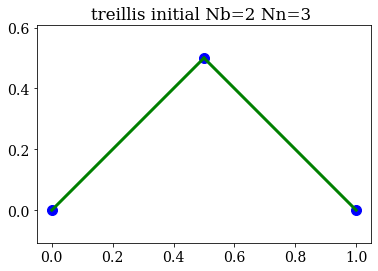

In [62]:
# vérification
trace_treillis(tr,"treillis initial")

## Amélioration du tracé

on souhaite améliorer la fonction précédente, en ajoutant la possibilité de tracer le numéro des noeuds.

- utilisation d'un paramètre optionnel `numero`


In [63]:
def trace_treillis(tr,titre,numero=False):
    '''trace d un treillis tr avec un titre'''
    ### BEGIN SOLUTION
    # tracer des nds
    plt.plot(tr.X[:,0],tr.X[:,1],'o',markersize=10,color='b')
    # et des numeros
    if numero:
        delta = (X[:,0].max() - X[:,0].min())*0.05
        for i in range(tr.nn):
            plt.text(tr.X[i,0]+delta,tr.X[i,1],str(i),fontsize=18)
    for i in range(tr.ne):
        n1=tr.G[i,0]
        n2=tr.G[i,1]
        plt.plot([tr.X[n1,0],tr.X[n2,0]],[tr.X[n1,1],tr.X[n2,1]],'-g',lw=3)
    plt.axis('equal')
    plt.title("%s Nb=%d Nn=%d "%(titre,tr.ne,tr.nn))
    plt.draw()
    ### END SOLUTION
    return

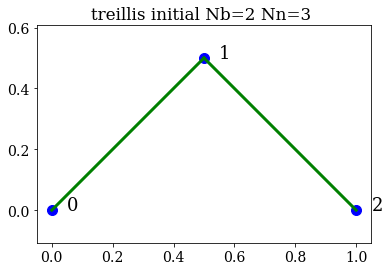

In [64]:
# vérification
trace_treillis(tr,"treillis initial",numero=True)

## Algorithme
**structure de donnees**: Treillis 

1. initialisation des données du treillis
2. fonctions pour calculer des données nécessaires: 
   - longueur des barres, 
   - matrice de rotation (cosinus directeur)
3. assemblage de la matrice avec une boucles sur les barres
4. application des conditions aux limites
5. résolution du système linéaire
6. analyse du résultat

**démarche**

- chaque partie correspond à l'écriture d'une fonction
- on valide à chaque étape
- validation de l'algorithme global sur un cas simple
- application au cas étudié

## Fonctions utiles

 - `longueur_treillis(tr)`  calcul des longueurs des barres
 - `matrice_rotation(tr,l)` calcul de matrice de rotation de la barre l
 
 Soit $R$ la matrice de rotation:

\[
\mathbf{R}=\left[\begin{array}{cc}
\cos\alpha & \sin\alpha\\
-\sin\alpha & \cos\alpha
\end{array}\right]
\]
la matrice de changement de repère $T$ s'écrit:
\[
\mathbf{T=}\left[\begin{array}{cccc}
R_{11} & R_{12} & 0 & 0\\
R_{21} & R_{22} & 0 & 0\\
0 & 0 & R_{11} & R_{12}\\
0 & 0 & R_{21} & R_{22}
\end{array}\right]
\]

In [65]:
def longueur_treillis(tr):
    """ calcul longueur des barres """
    # longueur des barres
    ### BEGIN SOLUTION
    L = np.zeros(tr.ne)
    for k in range(tr.ne):
        n12  = tr.G[k,:]
        L[k] = (tr.X[n12[0],0]-tr.X[n12[1],0])**2+(tr.X[n12[0],1]-tr.X[n12[1],1])**2
    L = np.sqrt(L);
    return L
    ### END SOLUTION

In [66]:
# vérification
L = longueur_treillis(tr)
print("Longueur des barres L=",L)

Longueur des barres L= [0.70710678 0.70710678]


In [67]:
# matrice de transfert T tq Ae = Tt.K.T
def matrice_rotation(tr,l):
    """ calcul matrice de transfert de l'element l (de 0 a ne-1) """
    ### BEGIN SOLUTION
    n12=tr.G[l,:] # nds
    # matrices de rotation pour la barre l
    c=(tr.X[n12[1],0]-tr.X[n12[0],0])
    s=(tr.X[n12[1],1]-tr.X[n12[0],1])
    L = np.sqrt(c**2 + s**2)
    c = c/L
    s = s/L
    R=np.array([[c,s],[-s,c]])
    Z=np.zeros((2,2))
    T=np.vstack( (np.hstack((R,Z)), np.hstack((Z,R))) )
    return T
    ### END SOLUTION

In [68]:
# vérification
T0 = matrice_rotation(tr,0)
T0 @ T0.transpose() 

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Assemblage de la matrice

Pour une barre le système $(4x4)$ s'écrit
\[
\mathbf{T^{t}}\left[\begin{array}{cccc}
K_{11} & 0 & K_{12} & 0\\
0 & 0 & 0 & 0\\
K_{21} & 0 & K_{22} & 0\\
0 & 0 & 0 & 0
\end{array}\right]\mathbf{T}\left[\begin{array}{c}
u_{1x}\\
u_{1y}\\
u_{2x}\\
u_{2y}\end{array}\right]
    =\left[\begin{array}{c}
F_{1x}\\
F_{1y}\\
F_{2x}\\
F_{2y}
\end{array}\right]
\]

qu'il faut assembler dans un système global $2 N_n x N_n$

$$ A U = F $$

- `assemblage(tr)` fonction d'assemblage pour le calcul de la matrice A (sans CL)

In [69]:
# assemblage de la matrice globale
def assemblage(tr):
    """ assemblage de la matrice de rigidite"""
    # matrice de rigidite elementaire
    Ke=np.array([[1,0,-1,0],[0,0,0,0],[-1,0,1,0],[0,0,0,0]]);
    A=np.zeros((2*tr.nn,2*tr.nn));
    ### BEGIN SOLUTION
    # longueur des barres
    L = longueur_treillis(tr)
    # Assemblage de la matrice
    for l in range(tr.ne):
        # matrices de rotation pour la barre l
        T = matrice_rotation(tr,l)
        # matrice elementaire
        Ae=(tr.S*tr.E/L[l])*np.dot(T.transpose(),np.dot(Ke,T));
        # assemblage
        n1 = tr.G[l,0]
        n2 = tr.G[l,1]
        ddl = [2*n1, 2*n1+1, 2*n2, 2*n2+1]
        for i in range(4):
            for j in range(4):
                A[ddl[i],ddl[j]] += Ae[i,j]
    return A
    ### END SOLUTION

In [78]:
# validation
# Assemblage de la matrice
A=assemblage(tr)
# verification A= At
print("Symétrie:",np.allclose(A,A.transpose()))
# somme des lignes
print("Somme des lignes:",np.sum(A,axis=1))

Symmétrie: True
Somme des lignes: [0. 0. 0. 0. 0. 0.]


## Applications de CL

sur la matrice A et le second membre B:
    - `climites(tr,AA,BB)`
    - si déplacement nul
       - met un 1 sur la diagonale, 0 sur la ligne et la colonne et dans B
    - forcage extérieure dans B

In [80]:
def climites(tr,AA,BB):
    '''imposition des CL dans la matrice A et des forces dans le 2nd membre B'''
    # attention on ne modifie pas les arguments mais on renvoie une nouvelle matrice A et B
    A = AA.copy()
    B = BB.copy()
    ### BEGIN SOLUTION
    # forces
    for i in range(tr.nn):
        B[2*i:2*i+2] += tr.FCL[i,:]
    # CL
    for i in range(tr.nn):
        # CL Dirichlet
        if tr.CL[i]==1:   # u=0
            A[2*i,:]=0;   A[:,2*i]=0;    A[2*i,2*i]=1;     B[2*i]=0;
        elif tr.CL[i]==2: # v=0
            A[2*i+1,:]=0; A[:,2*i+1]=0;  A[2*i+1,2*i+1]=1; B[2*i+1]=0;
        elif tr.CL[i]==3: # u,v=0
            A[2*i,:]=0;   A[:,2*i]=0;    A[2*i,2*i]=1;     B[2*i]=0;
            A[2*i+1,:]=0; A[:,2*i+1]=0;  A[2*i+1,2*i+1]=1; B[2*i+1]=0;
    return A,B
    ### END SOLUTION

In [83]:
# verification"
# second membre
B=np.zeros((2*tr.nn))
# CLimites
A,B=climites(tr,A,B)
print("B=\n",B)
print("CL sur A:")
print(A[0,:],A[1,:])
print(A[4,:],A[5,:])

B=
 [     0.      0.      0. -10000.      0.      0.]
CL sur A:
[1. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.] [0. 0. 0. 0. 0. 1.]


## Résolution

utilisation de la bibliothèque linalg pour résoudre le système linéaire
  - fonction solve
  
  - transformation du vecteur solution $2*Nn$ en un tableau de déplacement $(Nn,2)$

In [84]:
# calcul de la solution
U=np.linalg.solve(A,B)
U=U.reshape((tr.nn,2))
print("Deplacement U=\n",U)

Deplacement U=
 [[ 0.          0.        ]
 [ 0.         -0.00141421]
 [ 0.          0.        ]]


# Fin